In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import pandas as pd

from lstm_trader import fetch_bucketed_from_bitmex, preprocess, train, evaluate

input_dir = 'cache_input'
model_dir = 'cache_model'
output_dir = 'cache_output'

In [2]:
df = fetch_bucketed_from_bitmex('XBTZ19', '1h')

In [3]:
preprocess(df, input_dir)

In [4]:
train(
    input_dir=input_dir,
    output_dir=output_dir,
    model_dir=model_dir,
    checkpoint_path=None,
    # checkpoint_path='cache_output/checkpoint.pth',
    hidden_dim=32,
    n_epochs=8,
    seq_len=128,
    batch_size=1024,
)

Using device cpu.
| epoch | trai loss | vali loss | time/s |
| ----: | --------- | --------- | -----: |
|     0 | 1.478e-01 | 2.982e-02 |      8 |
|     1 | 8.695e-03 | 1.989e-02 |      7 |
|     2 | 5.830e-03 | 1.957e-02 |      9 |
|     3 | 5.003e-03 | 1.666e-02 |      9 |
|     4 | 4.222e-03 | 1.568e-02 |      8 |
|     5 | 4.146e-03 | 1.517e-02 |      8 |
|     6 | 4.072e-03 | 1.477e-02 |      8 |
|     7 | 4.013e-03 | 1.441e-02 |      8 |


loss(trai) = 0.0039227730594575405
loss(vali) = 0.0144097451120615
loss(test) = 0.171953022480011


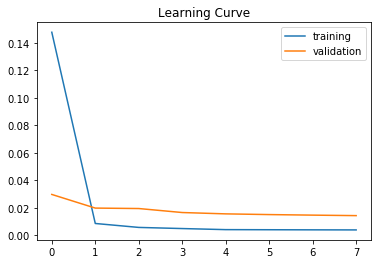

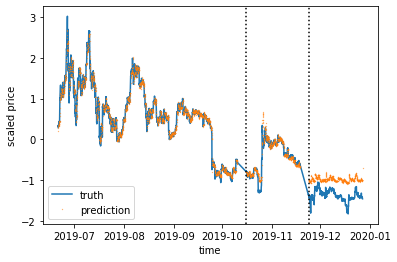

In [5]:
evaluate(input_dir, output_dir, model_dir, seq_len=128)